In [1]:
import pandas as pd
import missingno as msno

# importing sys
import sys
# adding helper_func to the system path
sys.path.insert(0, '../helper_functions/')
# importing actual functions
from helper_functions import character_df, fillna_centrl_tendcy, null_reminders, turkey_outliers
pd.set_option('display.max_columns', None)

In [2]:
damage_assessment = pd.read_csv('../../Data/csv_building_damage_assessment.csv')
building_ownership = pd.read_csv('../../Data/csv_building_ownership_and_use.csv')
building_structure = pd.read_csv('../../Data/csv_building_structure.csv')
district_Ind_demo = pd.read_csv('../../Data/individual_demographics_individual_social_security/csv_individual_demographics.csv') 
district_Ind_SS = pd.read_csv('../../Data/individual_demographics_individual_social_security/csv_individual_social_security.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,29,34,35,36,37,38,39,40,41,42,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print(damage_assessment.shape)
damage_assessment.isnull().sum()

Ideally the solid bars are what we want to see so that we can combine this dataset with the building structure to then begin predicting damage grade of each building (joinging via building id).

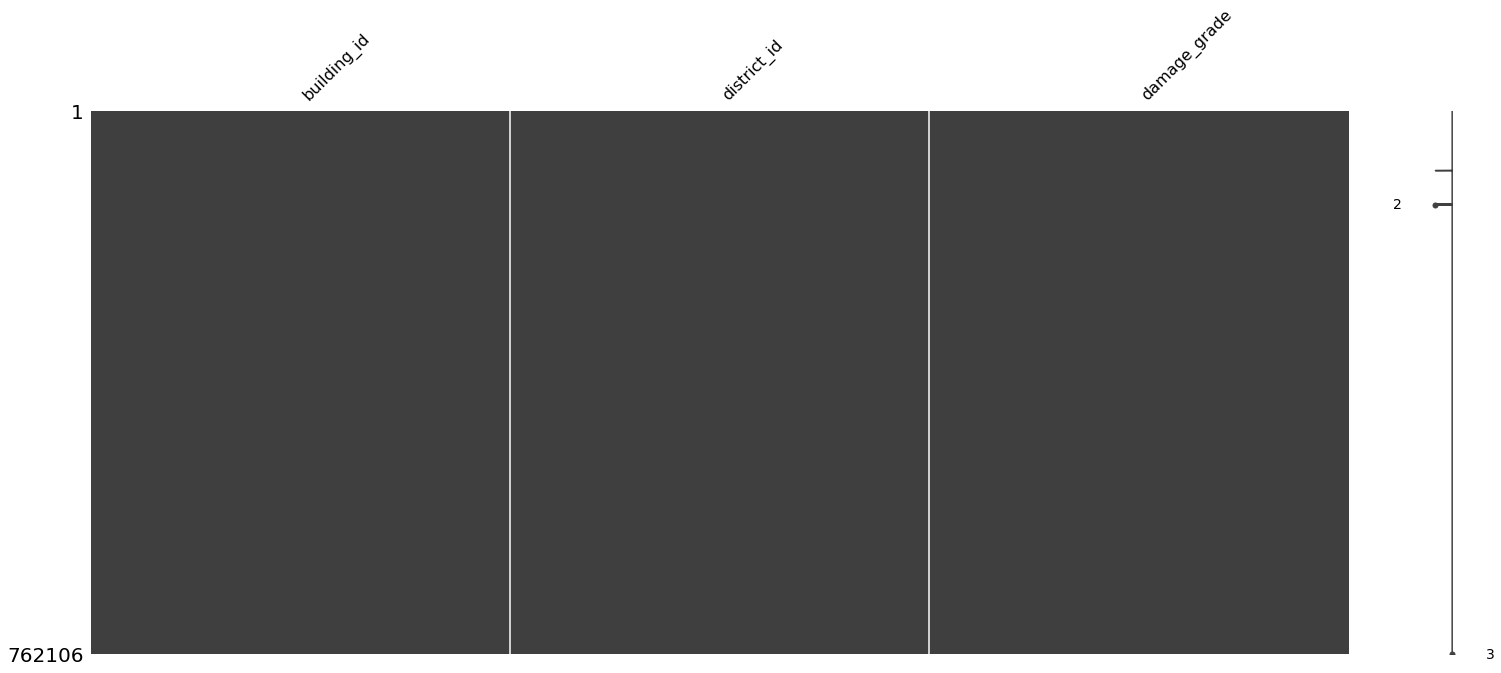

In [11]:
msno.matrix(damage_assessment[['building_id','district_id','damage_grade']]);

In [12]:
damage_assessment[['building_id','building_id','damage_grade']].head() # target column is 'damage_grade'

,building_id,building_id,damage_grade
0,120101000011,120101000011,Grade 3
1,120101000021,120101000021,Grade 5
2,120101000031,120101000031,Grade 2
3,120101000041,120101000041,Grade 2
4,120101000051,120101000051,Grade 1


In [19]:
damage_assessment['damage_grade'].unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4', nan],
      dtype=object)

In [20]:
print(damage_assessment['building_id'].nunique())
damage_assessment[['damage_grade']].dropna().nunique()

762106


damage_grade    5
dtype: int64

For Reference the actual meanings of each different grade: <br>

Grade 1 : Hairline to thin cracks in plaster on few walls, falling of plaster bits in limited parts, fall of loose stone from upper part of the building in a few cases, only architectural repairs needed.

Grade 2 : Cracks in many walls, falling of plaster in last bits over large area, damage to non structural parts like chimney, projecting cornices. The load carrying capacity of the building is not reduced appreciably.

Grade 3 : Large and extensive cracks in most walls, collapse of small portion of non load-bearing walls, roof tile detachment, tilting or failing of chimneys, failure of individual non-structural elements such as partition/gable walls, delamination of stone/adobe walls, load carrying capacity of structure is partially reduced and significant structural repair is required.

Grade 4 : Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.

Grade 5 : Total or near collapse of the building

In [21]:
damage_assessment['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

---
Building Ownership

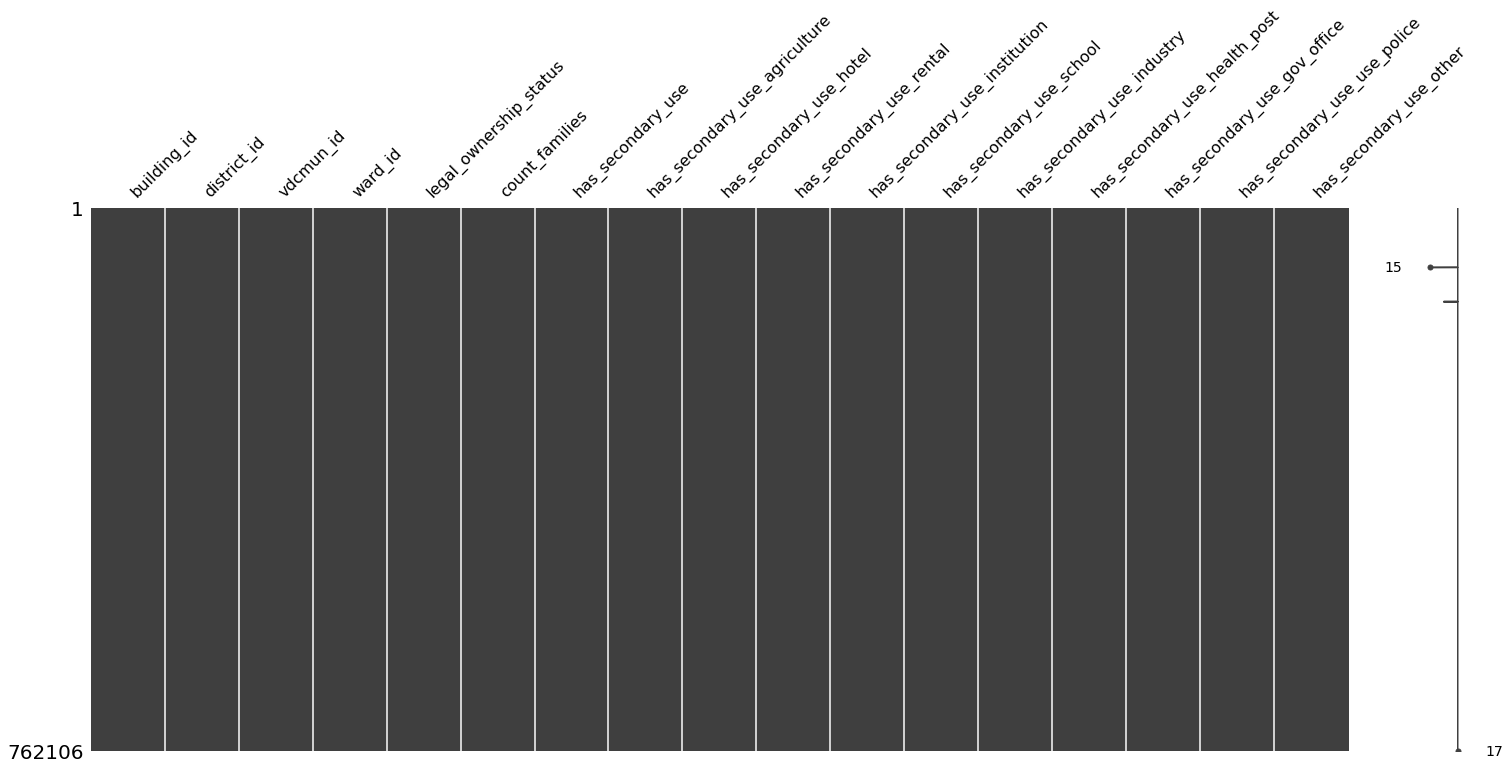

In [15]:
msno.matrix(building_ownership);

In [11]:
building_ownership.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype='object')

In [16]:
building_ownership.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


---
Building Structure

In [17]:
print(building_structure.shape)
building_structure.head()

(762106, 31)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


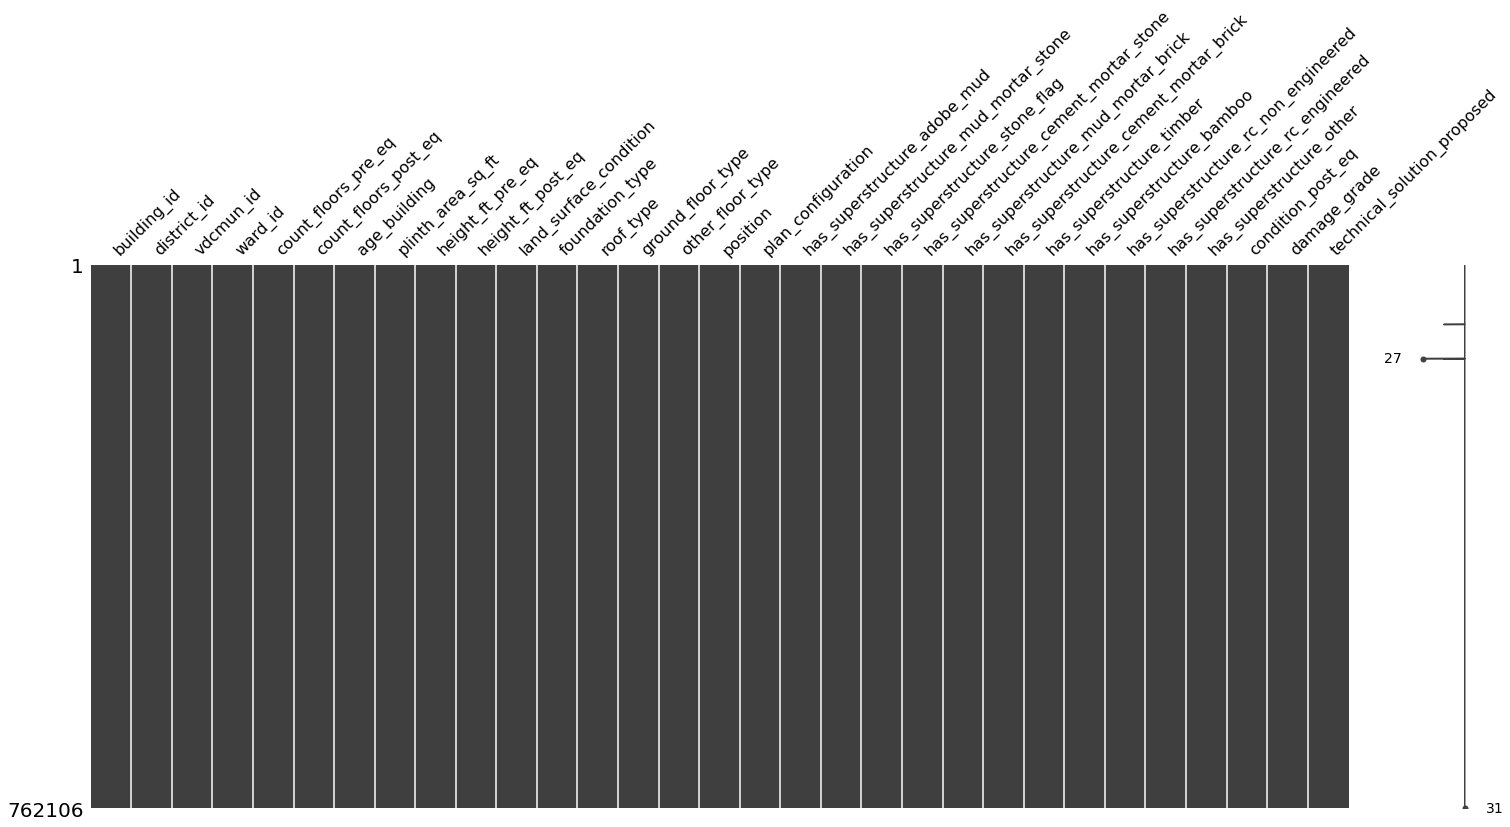

In [30]:
msno.matrix(building_structure);

In [3]:
building_structure.set_index('building_id',inplace=True)
print(building_structure.index[:4])
building_ownership.set_index('building_id',inplace=True)
print(building_ownership.index[:4])

Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')
Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')


In [4]:
result = pd.concat([building_structure, building_ownership], axis=1).reindex(building_structure.index)

In [34]:
result.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [37]:
print('There are ',result.shape[0],'buildings in this combined dataset.')

There are  762106 buildings in this combined dataset.


In [35]:
# there are so few missing values .... can impute these with average for the district area
result.isnull().sum()

district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_supers

In [5]:
charac_df = character_df(result)
charac_df

,column_name,null_count,percent_missing,categorical_unique,dtypes
0,district_id,0,0.0,not cat.,int64
1,vdcmun_id,0,0.0,not cat.,int64
2,ward_id,0,0.0,not cat.,int64
3,count_floors_pre_eq,0,0.0,not cat.,int64
4,count_floors_post_eq,0,0.0,not cat.,int64
5,age_building,0,0.0,not cat.,int64
6,plinth_area_sq_ft,0,0.0,not cat.,int64
7,height_ft_pre_eq,0,0.0,not cat.,int64
8,height_ft_post_eq,0,0.0,not cat.,int64
9,land_surface_condition,0,0.0,"[Flat, Moderate slope, Steep slope]",object


--- 
Looking at individual info by district:
- Demographic 
- Social Security 

In [39]:
district_Ind_SS.head()

,individual_id,district_id,vdcmun_id,ward_id,has_social_security_elder_citizen,has_social_security_child_security,has_social_security_extinct_caste,has_social_security_single_woman,has_social_security_handicap,has_social_security_pension,has_social_security_other,has_social_security_not_applicable,has_social_security_none
0,12010100001101001,12,1207,120703,0,0,0,0,0,0,0,1,0
1,12010100001101002,12,1207,120703,0,0,0,0,0,0,0,1,0
2,12010100001101003,12,1207,120703,0,0,0,0,0,0,0,1,0
3,12010100002101001,12,1207,120703,0,0,0,1,0,0,0,0,0
4,12010100002101002,12,1207,120703,0,0,0,0,0,0,0,1,0


In [40]:
district_Ind_demo.head()

,individual_id,district_id,vdcmun_id,ward_id,gender_individual,age_individual,presence_in_household,disability_individual,has_registered_birth,education_level_individual,marital_status_individual
0,12010100001101001,12,1207,120703,Male,31,Mostly Present,No,NaN,Illiterate,Married
1,12010100001101002,12,1207,120703,Female,58,Mostly Present,No,NaN,Illiterate,Married
2,12010100001101003,12,1207,120703,Male,15,Mostly Present,No,NaN,Class 7,Not Married
3,12010100002101001,12,1207,120703,Female,62,Mostly Present,No,NaN,Illiterate,Widow/Widower
4,12010100002101002,12,1207,120703,Male,23,Not present-Abroad,No,NaN,Class 6,Married
